# Model Specification

Model specification refers to the selection of the general function that we are fitting to the data. We need to select:

- the dependent variable(s)
- the independent variable(s)
- the functional form

For instance, we may assume that the dependent variable is a linear function of two independent variables. If the model is not correctly specified, regression assumptions will be violated and the model will not be accurate. Below we define and explain many of the common model specification errors.

In [88]:
# importing the libraries
import numpy as np
import statsmodels.api as sm
from statsmodels import regression
import matplotlib.pyplot as plt

# Let us also increase the size of the plot
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (14,10)

## 1. Exclusion of important variables

In [5]:
# pull the pricing data for two of our stocks and S&P 500:
# Let us load the data for the two stocks:

import pandas_datareader.data as web
import datetime as dt

start = dt.datetime(2013,1,1)
end = dt.datetime(2015,1,1)

benchmark =  web.DataReader('SPY', "yahoo", start, end)['Adj Close']
LRCX = web.DataReader('LRCX', "yahoo", start, end)['Adj Close']
AAPL = web.DataReader('AAPL', "yahoo", start, end)['Adj Close']

In [6]:
# Now, we perform linear regression by regressing by regressing AAPL on LRCX and then regressing both of them separately on S&P 500:
linreg1=regression.linear_model.OLS(AAPL, sm.add_constant(LRCX)).fit()
linreg2=regression.linear_model.OLS(LRCX, sm.add_constant(benchmark)).fit()
linreg3=regression.linear_model.OLS(AAPL, sm.add_constant(benchmark)).fit()

In [23]:
# Let us see the alphas and betas of the three regressions:
print("---------AAPL(LRCX)---------")
print(f"Alpha:\t{linreg1.params[0]}")
print(f"Beta:\t{linreg1.params[0]}")
print(f"R-Sq.:\t{linreg1.rsquared}")
print("----------------------------")


print("---------LRCX(SP500)---------")
print(f"Alpha:\t{linreg2.params[0]}")
print(f"Beta:\t{linreg2.params[0]}")
print(f"R-Sq.:\t{linreg2.rsquared}")
print("----------------------------")


print("---------AAPL(SP500)---------")
print(f"Alpha:\t{linreg3.params[0]}")
print(f"Beta:\t{linreg3.params[0]}")
print(f"R-Sq.:\t{linreg3.rsquared}")
print("----------------------------")


---------AAPL(LRCX)---------
Alpha:	0.9511039982713579
Beta:	0.9511039982713579
R-Sq.:	0.9206425699489377
----------------------------
---------LRCX(SP500)---------
Alpha:	-47.67693820396447
Beta:	-47.67693820396447
R-Sq.:	0.8818482365358064
----------------------------
---------AAPL(SP500)---------
Alpha:	-15.207117323670555
Beta:	-15.207117323670555
R-Sq.:	0.8241915568739018
----------------------------


It's hard to see consistency, or lack of it, since it is asymptotic and probabilistic. However, we can extend our sample period to see how the R-squared value changes. The correlation between the stocks and the market seems to persist, while the correlation between the two stocks drops. So we would be better off predicting the stock prices from the market price than from each other.

In [32]:
# Let us pull even older data:

start = dt.datetime(2009,1,1)
end = dt.datetime(2015,1,1)

benchmark =  web.DataReader('SPY', "yahoo", start, end)['Adj Close']
LRCX = web.DataReader('LRCX', "yahoo", start, end)['Adj Close']
AAPL = web.DataReader('AAPL', "yahoo", start, end)['Adj Close']

In [33]:
# Doing the regression again:
linreg1=regression.linear_model.OLS(AAPL, sm.add_constant(LRCX)).fit()
linreg2=regression.linear_model.OLS(LRCX, sm.add_constant(benchmark)).fit()
linreg3=regression.linear_model.OLS(AAPL, sm.add_constant(benchmark)).fit()

In [34]:
print("---------AAPL(LRCX)---------")
print(f"Alpha:\t{linreg1.params[0]}")
print(f"Beta:\t{linreg1.params[0]}")
print(f"R-Sq.:\t{linreg1.rsquared}")
print("----------------------------")


print("---------LRCX(SP500)---------")
print(f"Alpha:\t{linreg2.params[0]}")
print(f"Beta:\t{linreg2.params[0]}")
print(f"R-Sq.:\t{linreg2.rsquared}")
print("----------------------------")


print("---------AAPL(SP500)---------")
print(f"Alpha:\t{linreg3.params[0]}")
print(f"Beta:\t{linreg3.params[0]}")
print(f"R-Sq.:\t{linreg3.rsquared}")
print("----------------------------")

---------AAPL(LRCX)---------
Alpha:	-1.701719092942794
Beta:	-1.701719092942794
R-Sq.:	0.5308795982911105
----------------------------
---------LRCX(SP500)---------
Alpha:	3.277209862632062
Beta:	3.277209862632062
R-Sq.:	0.7365892319861822
----------------------------
---------AAPL(SP500)---------
Alpha:	-6.097472423433426
Beta:	-6.097472423433426
R-Sq.:	0.7888440948618285
----------------------------


Now, we can clearly see that it was not a very good idea to model this relationship as the R-Squared has fallen to almost 0.50 now! Hence, not a very good idea!
But relationship between the two stocks with S&P 500 is pretty consistent. It was expected as SP500 is an indicator of the market.

## 2. Inclusion of unnecessary  variables

In [98]:
start = dt.datetime(2017,1,1)
end = dt.datetime(2021,1,1)

x1 = web.DataReader('PEP', "yahoo", start, end)['Adj Close']
x2 = web.DataReader('MCD', "yahoo", start, end)['Adj Close']
x3 = web.DataReader('SPY', "yahoo", start, end)['Adj Close']
x4 = web.DataReader('KO', "yahoo", start, end)['Adj Close']
y  = web.DataReader('PG', "yahoo", start, end)['Adj Close']

In [99]:
# Let us build a random linear model: Let us say with x1
slinreg1=regression.linear_model.OLS(y, sm.add_constant(x1)).fit()
slinreg1_pred = slinreg1.params[0] + slinreg1.params[1]*x1

In [100]:
# Now, let us run MLG:
mlr1 = regression.linear_model.OLS(y, sm.add_constant(np.column_stack((x1,x2,x3,x4)))).fit()
mlr1_pred = mlr1.params[0] + mlr1.params[1]*x1 + mlr1.params[2]*x2 + mlr1.params[3]*x3 +  mlr1.params[4]*x4

In [101]:
# The result:
print(f"SLR R-Squared: {slinreg1.rsquared}")
print(f"MLR R-Squared: {mlr1.rsquared}")

SLR R-Squared: 0.9254995334833925
MLR R-Squared: 0.9320189045741336


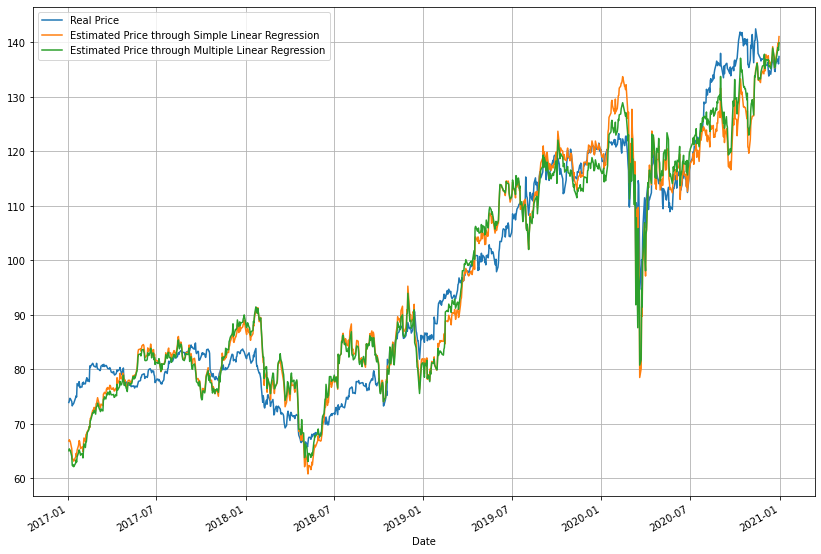

In [102]:
# Plotting them:
y.plot(label="Real Price")
slinreg1_pred.plot(label="Estimated Price through Simple Linear Regression")
mlr1_pred.plot(label="Estimated Price through Multiple Linear Regression")
plt.legend()
plt.grid();

SLR R-Squared: 0.9379833470225502
MLR R-Squared: 0.9432579871749498


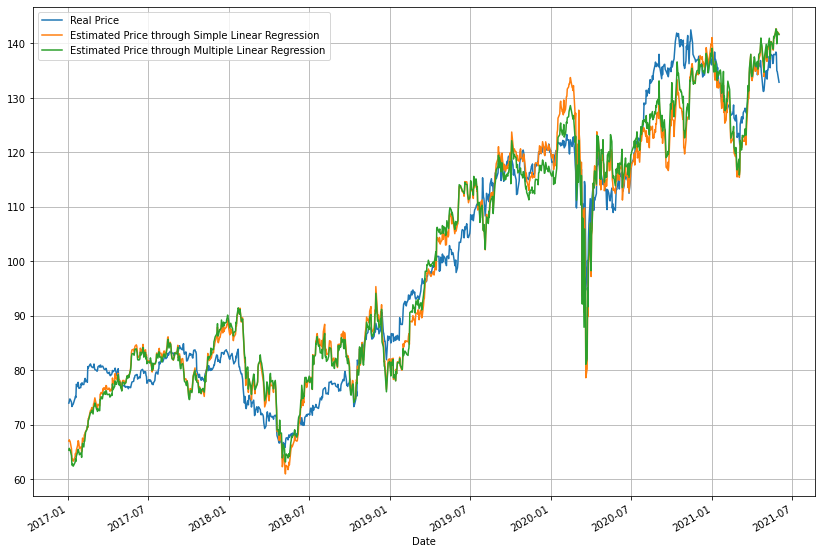

In [104]:
# Now let us fit the same model 6-months after that time period:
start = dt.datetime(2017,1,1)
end = dt.datetime(2021,6,1) # Today is June 2 :)))

x1 = web.DataReader('PEP', "yahoo", start, end)['Adj Close']
x2 = web.DataReader('MCD', "yahoo", start, end)['Adj Close']
x3 = web.DataReader('SPY', "yahoo", start, end)['Adj Close']
x4 = web.DataReader('KO', "yahoo", start, end)['Adj Close']
y  = web.DataReader('PG', "yahoo", start, end)['Adj Close']

# Doing the regression again:
linreg1=regression.linear_model.OLS(AAPL, sm.add_constant(LRCX)).fit()
linreg2=regression.linear_model.OLS(LRCX, sm.add_constant(benchmark)).fit()
linreg3=regression.linear_model.OLS(AAPL, sm.add_constant(benchmark)).fit()

# Simple Linear Regression:
slinreg1=regression.linear_model.OLS(y, sm.add_constant(x1)).fit()
slinreg1_pred = slinreg1.params[0] + slinreg1.params[1]*x1

# Multiple Linear Regression:
mlr1 = regression.linear_model.OLS(y, sm.add_constant(np.column_stack((x1,x2,x3,x4)))).fit()
mlr1_pred = mlr1.params[0] + mlr1.params[1]*x1 + mlr1.params[2]*x2 + mlr1.params[3]*x3 +  mlr1.params[4]*x4

# R-Squared:
# The result:
print(f"SLR R-Squared: {slinreg1.rsquared}")
print(f"MLR R-Squared: {mlr1.rsquared}")

# Plotting the graph:
# Plotting them:
y.plot(label="Real Price")
slinreg1_pred.plot(label="Estimated Price through Simple Linear Regression")
mlr1_pred.plot(label="Estimated Price through Multiple Linear Regression")
plt.legend()
plt.grid();

## 3. Errors in Independent Variables

After we pick the variables we wish to include, we need to specify a shape for the function. Although a regression requires that the function be linear in the coefficients, we can manipulate the variables to achieve various types of functions. For instance, the model $Y_i = b_0 + b_1 X_i^2 + \epsilon_i$ gives a quadratic relationship between $X$ and $Y$, while the log-linear model $\ln Y_i = b_0 + b_1 X_i + \epsilon_i$ gives an exponential one. Generally we select the form based on our expectation of the relationship: for example, a log-linear model is good when we expect the rate of growth of $Y$ to be related to $X$.

If the wrong form is selected, then we may be unable to get a good fit. In fact, the model may lead to absurd conclusions. For example, if we use a linear model where a logarithmic one would have been more appropriate, we may predict that the number of companies in a certain category becomes negative instead of approaching zero.

We also have to be careful not to pick a functional form that overfits the data. Arbitrarily using high-degree polynomials leads to overfitting since they have more degrees of freedom. Another issue is data-mining: if we try different models until we find the one that looks best, we are overfitting to the sample at the expense of future predictivity.

## 4. Pooling different types of data

If we attempt to use one model for two populations for which separate models would be more appropriate, we get results that are misleading in one direction or the other. For instance, if we mix data about men's and women's wages, there may be too much spread to find a model that fits well, as in the artificial example below.

In [108]:
# Create artificial pools:
sample1 = np.arange(30) + 4*np.random.randn(30)
sample2 = sample1 + np.arange(30)
pool = np.hstack((sample1, sample2))

In [124]:
# Run a regression on the pooled data, with the independent variable being the original indices
model = regression.linear_model.OLS(pool, sm.add_constant(np.hstack((np.arange(30), np.arange(30))))).fit()

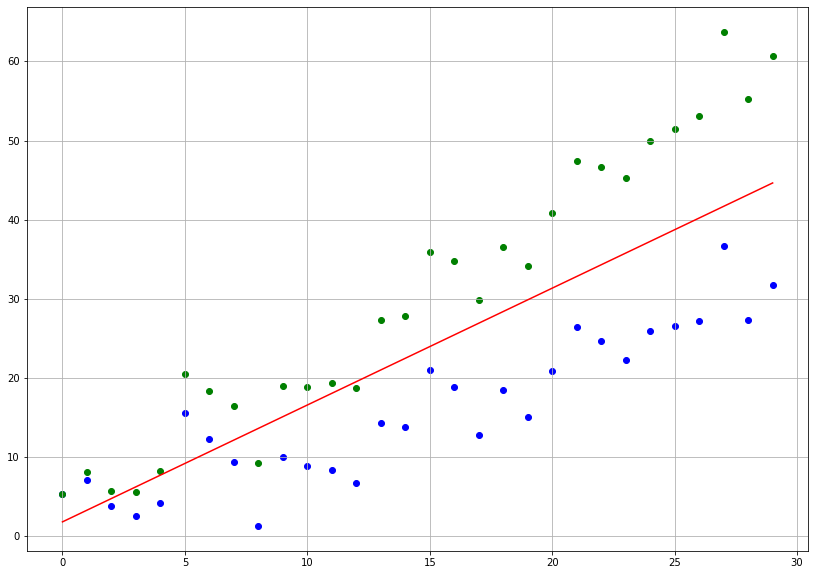

In [128]:
# Plot the two samples along with the regression line
plt.scatter(np.arange(30), sample1, color='b')
plt.scatter(np.arange(30), sample2, color='g')
plt.grid()
plt.plot(model.params[0] + model.params[1]*np.arange(30), color='r');

It's clear that two separate models for the two datasets would be more appropriate. Note that, as above, this can lead to assumption violations like heteroskedasticity and errors that are not normally distributed.

# Nonstationary time series

A stationary process is one whose joint probability distribution does not change with time. In particular, its mean and variance are constant through time. When we apply regression models to time series, we must make the additional assumption that they are stationary. Otherwise, the t-statistics for the parameters will not be valid.

A random walk is a process for which the best estimate for the next value is the previous value; if you were to walk randomly, your location after the each step would be somewhere near your location before the step but in an unpredictable direction. Formally, such a one-dimensional walk is described by the equation$$ x_t = x_{t-1} + \epsilon_t $$

where the error $\epsilon_t$ is homoskedastic, has mean zero, and is not autocorrelated. For example, exchange rates are often assumed to be random walks. Random walks have variance increasing with time, and are therefore not stationary. They are subject to spurious results, and two random walks will appear highly correlated very often. Try running the code below several times:

In [135]:
# First we obtain errors from standard normal distribution:
errors = [np.random.randn(100) for i in range(100)]
y = np.random.randn(100)

# Generate random walks:
random_walk = [[sum(errors[:i+1]) for i in range(100)] for error in errors]
y_walks = [sum(y[:i+1]) for i in range(100)]

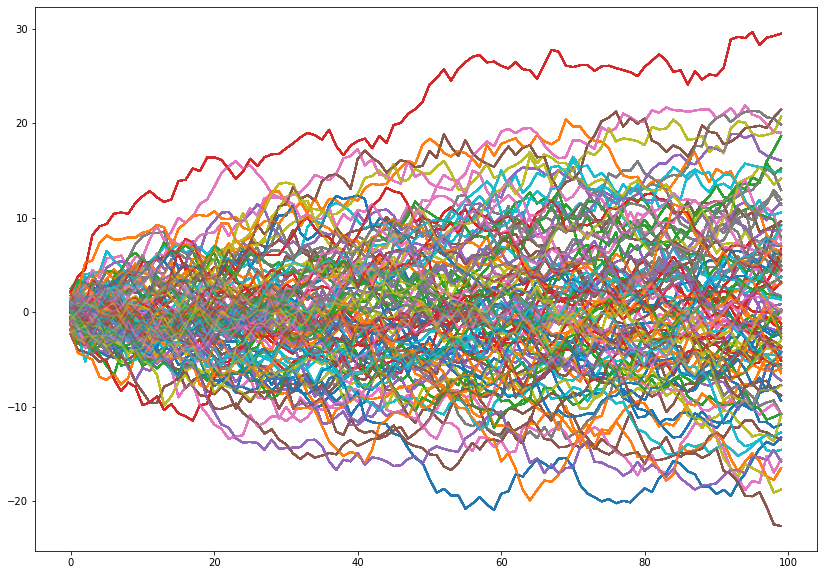

In [136]:
for i in range(100):
    plt.plot(random_walk[i], alpha=0.5)